In [1]:
import numpy as np
import os
from imutils import paths
from PIL import Image
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers import GlobalAveragePooling2D, BatchNormalization, Dropout
from keras.models import Model
import tensorflow as tf
import cv2
import io
from skimage.filters import gaussian
from skimage import exposure
import matplotlib.image as mpimg
import tensorflow
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, ReLU, BatchNormalization
from tensorflow.keras.layers import Add, GlobalAveragePooling2D
from skimage import io
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.optimizers import Adam, SGD, RMSprop, Adamax, Adadelta
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from keras import backend as k
from keras.preprocessing.image import ImageDataGenerator

import keras
import numpy as np
import cv2
import os
import random
import shutil
import pandas as pd
import csv
import zipfile
from keras import optimizers
from keras.models import Sequential,Model
from keras.layers import Dropout, Flatten, Dense,Input, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint
from keras.applications.imagenet_utils import preprocess_input
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.initializers import RandomNormal
import keras.backend as k
from sklearn.utils import shuffle
import io
from PIL import Image as pil_image
# from keras_retinanet import layers
import keras.backend as k
# import keras_retinanet

In [ ]:
cd E:\TA\Train&Validation

In [ ]:
#normalisasi
size=(224,224)

for infile in os.listdir():
    outfile=os.path.splitext(infile)[0]
    try:
        with Image.open(infile) as im:
            

            array=np.array(im)
            max_val=np.amax(array)
            normalized=(array/max_val)
            im = pil_image.fromarray(normalized)
            im.convert('RGB')
            im.thumbnail(size)
            im.save("E:\\TA\\Normalized\\" + infile, "TIFF")
    except OSError:
        pass
print("ok")

In [ ]:
cd E:\TA\Normalized

In [ ]:
#gaussian filter
size=(224,224)

for infile in os.listdir():
    outfile=os.path.splitext(infile)[0]
    try:
        with Image.open(infile) as im:
            
            array=np.array(im)
            gausfilter = gaussian(array, sigma=1, mode='constant', cval=0.0)
            im = pil_image.fromarray(gausfilter)
            im.convert('RGB')
            im.thumbnail(size)
            im.save("E:\\TA\\Gaussian\\" + infile, "TIFF")
    except OSError:
        pass
print("ok")

In [ ]:
#clahe
size=(224,224)

for infile in os.listdir():
    outfile=os.path.splitext(infile)[0]
    try:
        with Image.open(infile) as im:
            
            array=np.array(im)/255
            clahe = exposure.equalize_adapthist(array)
            im = pil_image.fromarray(clahe)
            im.convert('RGB')
            im.thumbnail(size)
            im.save("E:\\TA\\CLAHE\\" + infile, "TIFF")
    except OSError:
        pass
print("ok")

In [2]:
cd E:\TA

E:\TA


In [3]:
ls

 Volume in drive E is New Volume
 Volume Serial Number is 0A17-1E26

 Directory of E:\TA

07/22/2021  12:36 PM    <DIR>          .
07/22/2021  12:36 PM    <DIR>          ..
07/22/2021  01:52 PM       537,642,520 best_weight_AlexNet.h5
07/21/2021  09:30 PM    <DIR>          CLAHE
07/21/2021  07:52 PM    <DIR>          CSV
07/21/2021  08:35 PM    <DIR>          Gaussian
07/21/2021  08:22 PM    <DIR>          Normalized
07/21/2021  07:51 PM    <DIR>          Train&Validation
               1 File(s)    537,642,520 bytes
               7 Dir(s)  284,689,043,456 bytes free


In [4]:
fold_num=1 #Select Fold Number

In [5]:
#Here we set the data generators for applying data augmentation methods
train_datagen = ImageDataGenerator()#horizontal_flip=True,vertical_flip=True,zoom_range=0.05,rotation_range=360,width_shift_range=0.05,height_shift_range=0.05,shear_range=0.05)
test_datagen = ImageDataGenerator()
train_df =pd.read_csv('E:\\TA\\CSV\\train{}.csv'.format(fold_num)) #raed train csv file
validation_df = pd.read_csv('E:\\TA\\CSV\\validation{}.csv'.format(fold_num)) #raed validation csv file (Validation in the training process)
train_df = shuffle(train_df) #Shuffle the train data
test_df = pd.read_csv('E:\\TA\\CSV\\test{}.csv'.format(fold_num))#raed test csv file (For evaluating the final version of th

In [6]:
# generating one row 
train_df = train_df.sample(n =1900, random_state=1)
    
# display
train_df

,filename,class
2563,normal1_patient171_SR_2_IM00042.tif,normal
1893,cdnormal4_patient149_SR_2_IM00009.tif,normal
1327,137covid_patient1_SR_4_IM00117.tif,covid
1009,137covid_patient76_SR_3_IM00032.tif,covid
2366,cdunnormal_patient165_SR_2_IM00032.tif,normal
...,...,...
554,137covid_patient97_SR_2_IM00016.tif,covid
2149,cdunnormal_patient157_SR_2_IM00018.tif,normal
1351,137covid_patient29_SR_4_IM00008.tif,covid
3003,normal1_patient187_SR_2_IM00010.tif,normal


In [7]:
train_df.groupby('class').count()

,filename
class,
covid,913
normal,987


In [8]:
# generating one row
validation_df = validation_df.sample(n = 475, random_state = 1)
    
# display
validation_df

,filename,class
191,137covid_patient105_SR_3_IM00020.tif,covid
832,normal2_patient314_SR_2_IM00033.tif,normal
111,137covid_patient120_SR_2_IM00022.tif,covid
262,137covid_patient120_SR_3_IM00025.tif,covid
670,normal5_patient226_SR_2_IM00024.tif,normal
...,...,...
865,normalcd1_patient412_SR_2_IM00032.tif,normal
304,137covid_patient18_SR_3_IM00013.tif,covid
200,137covid_patient10_SR_3_IM00016.tif,covid
394,137covid_patient118_SR_4_IM00010.tif,covid


In [9]:
validation_df.groupby('class').count()

,filename
class,
covid,244
normal,231


In [10]:
test_df = test_df.drop(test_df[test_df['class']=='normal'].sample(frac =.94).index)

In [11]:
# generating one row
test_df = test_df.sample(n =200, random_state=1)
    
# display
test_df

,filename,class
363,137covid_patient115_SR_4_IM00004.tif,covid
41,137covid_patient10_SR_2_IM00024.tif,covid
6862,normal5_patient383_SR_2_IM00041.tif,normal
1984,normal1_patient248_SR_2_IM00018.tif,normal
35,137covid_patient10_SR_2_IM00015.tif,covid
...,...,...
5495,normal4_patient221_SR_2_IM00015.tif,normal
354,137covid_patient105_SR_4_IM00121.tif,covid
6650,normal5_patient213_SR_2_IM00020.tif,normal
241,137covid_patient118_SR_3_IM00014.tif,covid


In [12]:
test_df.groupby('class').count()

,filename
class,
covid,93
normal,107


In [13]:
shape=(224,224,3) #shape of the dataset images (in TIFF format)

In [14]:
#Create the generators
train_generator = train_datagen.flow_from_dataframe(
      dataframe=train_df,
      directory='E:\\TA\\CLAHE\\',
      x_col="filename",
      y_col="class",
      target_size=shape[:2],
      batch_size=32,
      class_mode='categorical',color_mode="rgb",shuffle=True)
validation_generator = test_datagen.flow_from_dataframe(
        dataframe=validation_df,
        directory='E:\\TA\\CLAHE\\',
        x_col="filename",
        y_col="class",
        target_size=shape[:2],
        batch_size=32,
        class_mode='categorical',color_mode="rgb",shuffle=True)
test_generator = test_datagen.flow_from_dataframe(
        dataframe=test_df,
        directory='E:\\TA\\CLAHE\\',
        x_col="filename",
        y_col="class",
        target_size=shape[:2],
        batch_size=32,
        class_mode='categorical',color_mode="rgb",shuffle=True)

Found 1900 validated image filenames belonging to 2 classes.
Found 475 validated image filenames belonging to 2 classes.
Found 200 validated image filenames belonging to 2 classes.


In [16]:
data = []
for num,img_name in enumerate(train_generator.filenames): #load image
    # gt_ind=test_generator.classes[num] #get the loaded image class index
    img=cv2.imread(os.path.join('E:\\TA\\CLAHE\\',img_name),-1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.array(img)
    data.append(img)

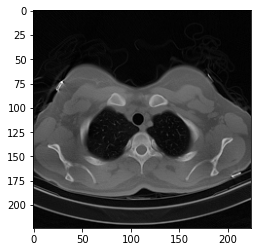

In [17]:
plt.imshow(data[1])

In [18]:
data = np.array(data)
data.shape

(1900, 224, 224, 3)

In [19]:
data2 = []
for num,img_name in enumerate(validation_generator.filenames): #load image
    # gt_ind=test_generator.classes[num] #get the loaded image class index
    img=cv2.imread(os.path.join('E:\\TA\\CLAHE\\',img_name),-1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = np.array(img)
    data2.append(img)

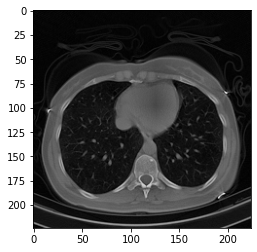

In [20]:
plt.imshow(data2[1])

In [21]:
data2 = np.array(data2)
data2.shape

(475, 224, 224, 3)

In [22]:
trainX, trainY = np.array(data), np.array(train_generator.classes)
valX, valY = np.array(data2), np.array(validation_generator.classes)
print(trainX.shape)
print(valX.shape)
print(trainY.shape)
print(valY.shape)

(1900, 224, 224, 3)
(475, 224, 224, 3)
(1900,)
(475,)


In [26]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224,224,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=384, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3), strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(4096, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(2048, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(2, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
batch_normalization_5 (Batch (None, 54, 54, 96)        384       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 256)       614656    
_________________________________________________________________
batch_normalization_6 (Batch (None, 26, 26, 256)       1024      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 384)      

In [27]:
es = EarlyStopping(monitor='val_loss',
                   patience=5,
                   mode='auto',
                   restore_best_weights=True)
checkpoint = ModelCheckpoint('best_weight_AlexNet.h5',
                             monitor='val_accuracy',
                             verbose=1,
                             save_best_only=True,
                             mode='auto',)

In [28]:
print("[INFO] training network...")
opt = Adam(lr=0.1, decay=1e-6)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(trainX, trainY, validation_data=(valX, valY), epochs=50, batch_size=32, callbacks=[es,checkpoint])

[INFO] training network...
Epoch 1/50
60/60 [==============================] - ETA: 0s - loss: 102761.9297 - accuracy: 0.5663
Epoch 00001: val_accuracy improved from -inf to 0.48632, saving model to best_weight_AlexNet.h5
60/60 [==============================] - 79s 1s/step - loss: 102761.9297 - accuracy: 0.5663 - val_loss: 184047.4219 - val_accuracy: 0.4863
Epoch 2/50
60/60 [==============================] - ETA: 0s - loss: 22.2722 - accuracy: 0.6247
Epoch 00002: val_accuracy did not improve from 0.48632
60/60 [==============================] - 76s 1s/step - loss: 22.2722 - accuracy: 0.6247 - val_loss: 1201.7299 - val_accuracy: 0.4821
Epoch 3/50
60/60 [==============================] - ETA: 0s - loss: 2.3645 - accuracy: 0.6232
Epoch 00003: val_accuracy did not improve from 0.48632
60/60 [==============================] - 77s 1s/step - loss: 2.3645 - accuracy: 0.6232 - val_loss: 2.5812 - val_accuracy: 0.4779
Epoch 4/50
60/60 [==============================] - ETA: 0s - loss: 1.6507 - a

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


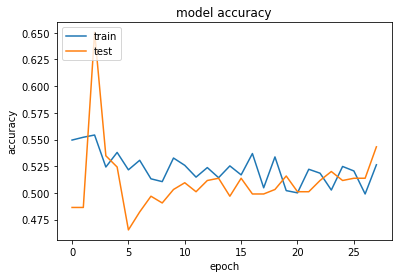

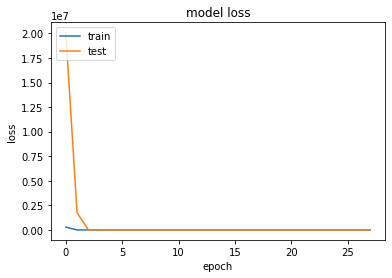

In [65]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [66]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
predictions = model.predict(valX, batch_size=32)
print(classification_report(valY,predictions.argmax(axis=1),target_names = train_generator.class_indices))

              precision    recall  f1-score   support

       covid       0.51      0.99      0.68       244
      normal       0.40      0.01      0.02       231

    accuracy                           0.51       475
   macro avg       0.46      0.50      0.35       475
weighted avg       0.46      0.51      0.36       475



In [48]:
cf_matrix = confusion_matrix(valY,predictions.argmax(axis=1))
print(cf_matrix)

[[  0 244]
 [  4 227]]


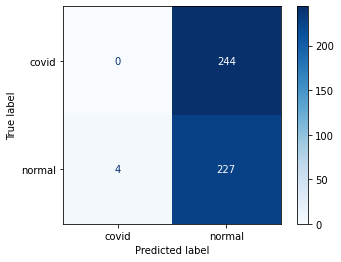

In [49]:
disp = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=validation_generator.class_indices)
disp.plot(cmap=plt.cm.Blues)